In [7]:
B6<-read.table("adamts_B6.txt",header=T)
B6

,id,nxf1,raw,normal,cohort
1,N30F4.192,B,0.005473881,0.002223781,B6
2,N30F4.196,B,0.005268219,0.00214023,B6
3,N30F4.202,B,0.0219772,0.008928305,B6
4,N30F4.207,B,0.002978839,0.001210162,B6
5,N30F4.217,B,0.003176875,0.001290615,B6
6,N30F4.218,B,0.003622804,0.001471775,B6
7,N30F4.199,C,0.02649444,0.01076345,B6
8,N30F4.210,C,0.004281812,0.001739499,B6
9,N30F4.215,C,0.006276129,0.002549696,B6
10,N30F4.216,C,0.007962358,0.003234732,B6


Q1 Is this a one-tailed or two-tailed test? Why?

A1 This should be considered a two tailed test. 
Although a one tailed test can be considered based on the previous data finding a majority of similar genes being dependent on Nxf1 expression.
However, in this case we are still measuring whether there is a difference (increased or decreased with respect to allele) and cannot exclude in either direction for either allele C or B, solely based on the previous results.

Q2 What test statistics would be most appropriate to compare data in B6.txt and why?

A2Here we are trying to determine whether there is a difference in gene expression for "gene 8" based on the presence of either the C and B allele of Nxf1.
The data is already normalized, however we must also check for equal variances. If the variances are equal, then we can proceed with the two sample t-test, however if the variances are not equal, then we would implement Welch's approximation.


In [21]:
var.test(normal~nxf1)


	F test to compare two variances

data:  normal by nxf1
F = 0.46464, num df = 5, denom df = 5, p-value = 0.4201
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.06501805 3.32052232
sample estimates:
ratio of variances 
         0.4646438 


In [23]:
t.test(normal~nxf1, var.equal = TRUE)


	Two Sample t-test

data:  normal by nxf1
t = -1.4216, df = 10, p-value = 0.1856
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.007923533  0.001751106
sample estimates:
mean in group B mean in group C 
    0.002877478     0.005963691 


Q3 What test statistic(s) would be most appropriate to compare data in F2.txt? Perform the test in R. (For this exercise, you may either exclude the heterozygous individual, EB216, or treat as if C; extra credit–does this sample matter to your overall conclusion?)

A3 In this dataset we have three different cohorts (4/3/09,4/15/09,4/16/09) and mice from each cohort with either the B or C allele (to avoid a headache, I am opting to exclude the heterozygous individual). 

In [136]:
F2<- read.table("adamts_balbF2.txt", header=T)
F2CB<-F2[-c(31),]

,id.f2,nxf1.f2,raw.f2,normal.f2,cohort.f2
1,EB026,B,7e-05,0.000740424,4/3/09
2,EB211,B,0.00012,0.001157392,4/3/09
3,EB030,B,0.00014,0.001380945,4/3/09
4,EB034,B,0.00022,0.002208735,4/3/09
5,EB319,B,0.00091,0.009084916,4/3/09
6,EB189,B,0.00213,0.001081516,4/15/09
7,EB237,B,0.0031,0.001573233,4/15/09
8,EB279,B,0.00349,0.001772814,4/15/09
9,EB222,B,0.00372,0.001890922,4/15/09
10,EB342,B,0.00214,0.001334754,4/16/09


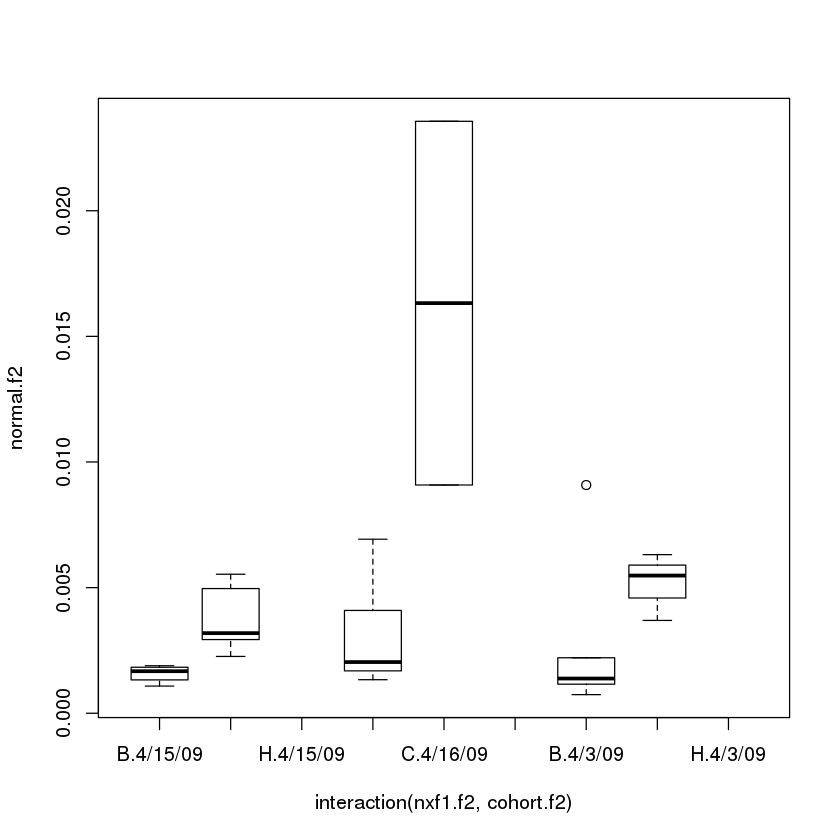

In [150]:
F2CB
plot(normal.f2~interaction(nxf1.f2,cohort.f2), data= F2CB)
                 

A3: First I will look at how the variation compares for each cohort for each allele. The boxplot above shows the normalized gene expression for "gene 8" by alleles B, C and the heterozygote(which does not contain a boxplot as the value was removed from our data, but still weirdly shows up on our boxplot...) and further separated by cohort date. 

We can see above that the variances do not appear to be equal for all groups, therefore we cannot lump all of the cohort dates together, and instead will separate them. 

In [161]:
F243 <- read.table("F243.txt", header=T)
F243
F2415 <- read.table("F2415.txt", header=T)
F2415
F2416 <- read.table("F2416.txt", header=T)
F2416

,id.f2,nxf1.f2,raw.f2,normal.f2,cohort.f2
1,EB026,B,7e-05,0.000740424,4/3/09
2,EB211,B,0.00012,0.001157392,4/3/09
3,EB030,B,0.00014,0.001380945,4/3/09
4,EB034,B,0.00022,0.002208735,4/3/09
5,EB319,B,0.00091,0.009084916,4/3/09
6,EB032,C,0.00037,0.00369398,4/3/09
7,EB346,C,0.00055,0.00547956,4/3/09
8,EB217,C,0.00063,0.006311733,4/3/09


,id.f2,nxf1.f2,raw.f2,normal.f2,cohort.f2
1,EB189,B,0.00213,0.001081516,4/15/09
2,EB237,B,0.0031,0.001573233,4/15/09
3,EB279,B,0.00349,0.001772814,4/15/09
4,EB222,B,0.00372,0.001890922,4/15/09
5,EB297,C,0.00445,0.002261018,4/15/09
6,EB266,C,0.00558,0.00283316,4/15/09
7,EB265,C,0.00596,0.003029921,4/15/09
8,EB241,C,0.00627,0.003188702,4/15/09
9,EB278,C,0.00891,0.00453021,4/15/09
10,EB225,C,0.01061,0.005392136,4/15/09


,id.f2,nxf1.f2,raw.f2,normal.f2,cohort.f2
1,EB342,B,0.00214,0.001334754,4/16/09
2,EB299,B,0.00217,0.001349456,4/16/09
3,EB336,B,0.00271,0.001686254,4/16/09
4,EB326,B,0.00289,0.001800217,4/16/09
5,EB319,B,0.00327,0.002037232,4/16/09
6,EB338,B,0.00335,0.002086975,4/16/09
7,EB362,B,0.00657,0.004091404,4/16/09
8,EB321,B,0.00776,0.004834029,4/16/09
9,EB323,B,0.01112,0.006926883,4/16/09
10,EB305,C,0.01459,0.009084457,4/16/09


A3 Looking at the data, we can also see that we have very small and unequal (B vs C) sample sizes for each cohort group. In this case, it would be better to use a non parametric test, such as the Mann-Whitney U test.

In [167]:
var.test(normal.f2~nxf1.f2, data=F243)
var.test(normal.f2~nxf1.f2, data=F2415)
var.test(normal.f2~nxf1.f2, data=F2416)
wilcox.test(normal.f2~nxf1.f2 ,paired=F, data=F243)
wilcox.test(normal.f2~nxf1.f2 ,paired=F, data=F2415)
wilcox.test(normal.f2~nxf1.f2 ,paired=F, data=F2416)


	F test to compare two variances

data:  normal.f2 by nxf1.f2
F = 6.8111, num df = 4, denom df = 2, p-value = 0.2642
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.1735392 72.5325761
sample estimates:
ratio of variances 
          6.811139 



	F test to compare two variances

data:  normal.f2 by nxf1.f2
F = 0.07397, num df = 3, denom df = 6, p-value = 0.05645
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.01120968 1.08993357
sample estimates:
ratio of variances 
        0.07397044 



	F test to compare two variances

data:  normal.f2 by nxf1.f2
F = 0.036171, num df = 8, denom df = 1, p-value = 0.001533
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 3.780975e-05 2.738459e-01
sample estimates:
ratio of variances 
        0.03617094 



	Wilcoxon rank sum test

data:  normal.f2 by nxf1.f2
W = 3, p-value = 0.25
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  normal.f2 by nxf1.f2
W = 0, p-value = 0.006061
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  normal.f2 by nxf1.f2
W = 0, p-value = 0.03636
alternative hypothesis: true location shift is not equal to 0


Q4 What do you conclude about the influence of Nxf1 on gene 8? How strong is the evidence overall?

A4 Nxf1 does not appear to have an effect on gene expression on gene 8. The data from the "B6" data set suggested that there is no difference in gene expression in the presence of allele B or C, p-value = 0.1856. Additionally, when using the Mann-Whitney U test for each cohort date in the "F2" data set, two returned a p-value of greater than .05 and cohort date 4.16  returned a p-value of .03, which is still relatively high. However, cohort date 4.16 had only two samples with the C allele and 9 samples of the B allele. With these data combined, there is strong evidence that Nxf1 has little effect on the expression of gene 8.

Q5 Are parametric or non-parametric test more sensitive to outliers values?

A5 Parametric tests such as the t-test, compare sample means, whereas nonparametric tests such as the Mann-Whitney U test, compares medians. Therefore parametric tests are more sensitive to outlier values. 